### M. NIVETHA 215229126

## LAB - 6 PREDICTIVE ANALYSIS FOR HOSPITALS

### STEP 1 - IMPORT DATASET

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")

##### PROPERTIES SUCH AS HEAD, SHAPE, COLUMNS, DTYPES, INFO AND VALUE_COUNTS

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df['BMI'].value_counts()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 248, dtype: int64

### STEP -2 IDENTIFY RELATIONSHIPS BETWEEN FEATURE

##### CREATE A HEATMAP FOR THE DATASET AND UNDERSTAND THE DATA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

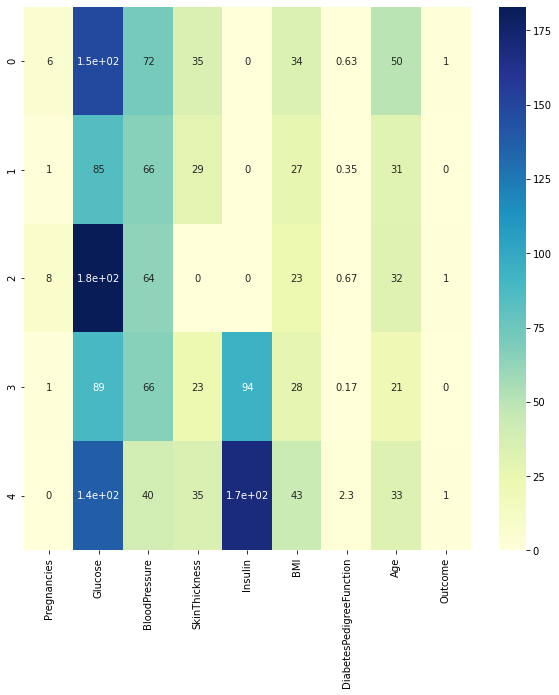

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.head(), annot=True,cmap ='YlGnBu')


### STEP - 3: PREDICTION USING ONE FEATURE

##### CREATE LOGISTIC REGRESSION MODEL, TRAIN WITH "AGE" AS X AND "OUTCOME" FEATURE AS Y

In [11]:
X = df[['Age']]
y = df[['Outcome']]

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(X_train,y_train)

LogisticRegression()

In [16]:
LOR.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### PRINT MODEL PARAMETER VALUES: COEF_ AND INTERCEPT_

In [17]:
LOR.coef_

array([[0.05221912]])

In [18]:
LOR.intercept_

array([-2.39506398])

##### QUERY: A PERSON IS 60 YEARS OLD, WILL HE BE DIABETIC ?

In [19]:
LOR.predict([[60]])

array([1], dtype=int64)

In [20]:
lrf = LOR.coef_ * 60 + LOR.intercept_
from scipy.special import expit
expit(lrf)

array([[0.67657656]])

__output > 0.5 , Yes A person with 60 years old will become diabetic__

### STEP - 4: PREDICTION USING MANY FEATURES

##### SELECT THREE FEATURES 'GLUCOSE', 'BMI' AND 'AGE' FROM YOUR DATSET, CALL IT AS X

In [21]:
X1 = df[['Glucose','BMI','Age']]
y1 = df[['Outcome']]

##### CREATE A NEW LOGISTIC REGRESSION MODEL, TRAIN WITH X AND 'OUTCOME' AS Y

In [22]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=42)

In [23]:
LOR1 = LogisticRegression()
LOR1.fit(X1_train, y1_train)

LogisticRegression()

In [24]:
LOR1.predict(X1_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### QUERY: FOR A PERSON, GLUCOSE =150, BMI = 30, AGE =40. WILL HE BECOME DIABETIC?

In [25]:
 LOR1.coef_

array([[0.03326879, 0.09717039, 0.04404934]])

In [26]:
LOR1.intercept_

array([-9.47396587])

In [27]:
lrf1 = LOR1.coef_ * 150*30*40 + LOR1.intercept_
from scipy.special import expit
expit(lrf1)

array([[1., 1., 1.]])

In [28]:
LOR1.predict_proba([[150,30,40]])

array([[0.45179089, 0.54820911]])

In [29]:
LOR1.predict([[150,30,40]])

array([1], dtype=int64)

__A person with Glucose =150, BMI=30, Age=40 will become DIABETIC__

### STEP - 5 : BUILD LOR MODEL WITH ALL FEATURES

##### CREATE LOR MODEL, TRAIN IT WITH X_TRAIN AND Y_TRAIN VALUES

In [30]:
X2 = df.drop(['Outcome'],axis =1)
y2 = df[['Outcome']]

In [31]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state=42)

In [32]:
LOR2 = LogisticRegression()
LOR2.fit(X2_train, y2_train)

LogisticRegression()

In [33]:
y2_pred = LOR2.predict(X2_test)

##### AUC SCORE

In [34]:
from sklearn.metrics import roc_auc_score
lor_auc3 = roc_auc_score(y2_test, y2_pred)
lor_auc3

0.7122658183103571

### STEP - 6 : [FORWARD SELECTION PROCEDURE]

#### FORWARD STEPWISE VARIABLE SELECTION PROCEDURE AND IMPLEMENTATION STEPS OF THE FORWARD STEPWISE PROCEDURE

###### DEFINE A GET_AUC () THAT CALCULATES AUC GIVEN  A CERTAIN SET OF VARIABLES

In [35]:
def get_auc (var, tar, df):
    fX = df[var]
    fy = df[tar]
    LOR4 = LogisticRegression()
    LOR4.fit(fX,fy)
    pred = LOR4.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y2, pred)
    return auc_val

get_auc(['Glucose', 'BMI'],['Outcome'],df)

0.8109328358208956

In [36]:
get_auc(['Pregnancies','BloodPressure', 'SkinThickness'],['Outcome'],df)

0.6444962686567164

##### DEFINE A FUNCTION BEST_NEXT() THAT RETURNS NEXT VARIABLE I  COMIBINATION WITH CURRENT VARIABLES

In [37]:
def next_best(current, cand, tar, df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = get_auc(current+[i], tar, df)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_var = i
    return best_var

In [38]:
tar = ['Outcome']
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness']
next_var = next_best(current, cand, tar, df)
print(next_var)

Glucose


In [39]:
tar = ["Outcome"]
current =[]
cand =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
max_num = 7
num_it = min(max_num, len(cand))
for i in range(0, num_it):
    next_var = next_best(current, cand, tar, df)
    current += [next_var]
    cand.remove(next_var)
    print("Variable added in Step "+str(i+1) +' is ' + next_var +".")

    

Variable added in Step 1 is Glucose.
Variable added in Step 2 is BMI.
Variable added in Step 3 is Pregnancies.
Variable added in Step 4 is DiabetesPedigreeFunction.
Variable added in Step 5 is BloodPressure.
Variable added in Step 6 is Age.
Variable added in Step 7 is SkinThickness.


In [40]:
print(current)

['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', 'Age', 'SkinThickness']


### STEP - 7 : PLOT LINE GRAPH OF AUC VALUES AND SELCECT CUT-OFF

###### SPLIT YOUR DATASET EQUALLY FOR TRAINING AND TESTING

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , stratify =y2, test_size = 0.5, random_state=42)

In [42]:
prediction = LOR2.predict_proba(X2_test)


###### PLOT AUC VALUES FOR EACH VARIABLE. 

In [43]:
train = pd.concat([X2_train, y2_train], axis =1)
test = pd.concat([X2_test, y2_test], axis =1)

In [44]:
def auc_train_test (variables, target, train, test):
    X_train = train [variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    LOR3 = LogisticRegression()
    
    LOR3.fit(X_train, Y_train)
    
    predictions_train = LOR3.predict_proba(X_train)[:,1]
    predictions_test = LOR3.predict_proba(X_test)[:,1]
    
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_train, predictions_test)
    
    return (auc_train, auc_test)

In [45]:
auc_values_train =[]
auc_values_test =[]
variables_evaluate=[]

for v in X2.columns:
    variables_evaluate.append(v)
    
    auc_train, auc_test = auc_train_test(variables_evaluate, ['Outcome'],train,test)
    
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

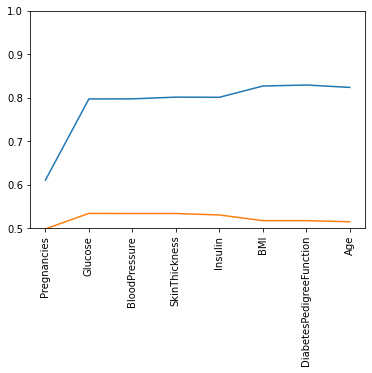

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)

plt.xticks(x, X2.columns, rotation =90)


plt.plot(x, my_train)
plt.plot(x, my_test)
plt.ylim(0.5, 1)
plt.show()

### STEP - 8 : DRAW CUMULATIVE GAIN CHART AND LIFT CHART

In [47]:
! pip install scikit-plot

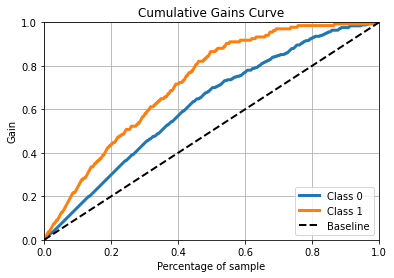

<Figure size 504x504 with 0 Axes>

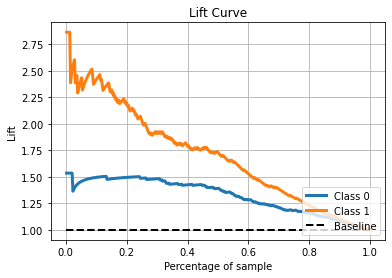

In [48]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y2_test, prediction)
plt.show()

plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y2_test, prediction)
plt.show()